In [1]:
# Importation du jeu de donnees

from keras.datasets import reuters

(x_train, y_train),(x_test, y_test) = reuters.load_data(num_words = 10000)

In [2]:
print("La forme de l'entrainement est:",x_train.shape)
print("La forme du test est:", x_test.shape)

La forme de l'entrainement est: (8982,)
La forme du test est: (2246,)


In [3]:
# Decodage du fil de presse

word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i-3,"?") for i in x_train[0]])

In [4]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [5]:
# Decodons les labels

#num_classes = max(y_train) + 1
#label_index = reuters.get_word_index()
#index_to_label = {v: k for k, v in label_index.items()}
#decoded_labels = [index_to_label.get(label, 'Unknown') for label in y_train[:10]]
#print("Le nombre de classes est:",num_classes)
#print(decoded_labels)

In [6]:
# Pretraitement des donnees

import numpy as np

def vectorisation_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results [i, sequence] = 1
    return results

x_train = vectorisation_sequences(x_train)
x_test = vectorisation_sequences(x_test)

In [7]:
# Pretraitement des labels

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
# Conception du modele

from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation = "relu", input_shape = (10000,)))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(46, activation = "softmax"))

model.summary()

C:\Users\Christian\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 647,214 (2.47 MB)

 Trainable params: 647,214 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Compilation du modele

model.compile(optimizer = "rmsprop",
              loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [10]:
# Decoupage en train_val set

x_val = x_train[:1000]
y_val = y_train[:1000]
x_part = x_train[1000:]
y_part = y_train[1000:]

In [13]:
# Entrainement du modele

history = model.fit(x_part, y_part, epochs = 20, batch_size = 256, 
          validation_data = (x_val,y_val))

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4440 - loss: 2.9742 - val_accuracy: 0.6510 - val_loss: 1.5269
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7176 - loss: 1.3238 - val_accuracy: 0.7410 - val_loss: 1.1470
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7925 - loss: 0.9709 - val_accuracy: 0.7670 - val_loss: 1.0353
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8443 - loss: 0.7237 - val_accuracy: 0.7730 - val_loss: 0.9819
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8876 - loss: 0.5325 - val_accuracy: 0.8030 - val_loss: 0.8758
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9109 - loss: 0.4242 - val_accuracy: 0.8150 - val_loss: 0.8917
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9317 - loss: 0.3411 - val_accuracy: 0.8130 - val_loss: 0.8763
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9386 - loss: 0.2845 - val_accuracy: 0.8200 - v

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

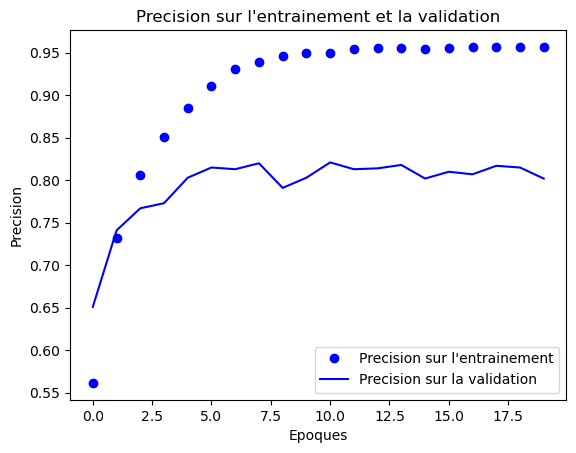

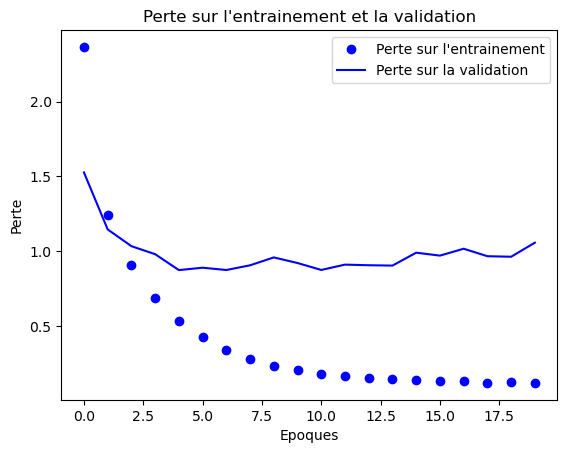

In [16]:
accuracy = history_dict["accuracy"]
loss = history_dict["loss"]
val_accuracy = history_dict["val_accuracy"]
val_loss = history_dict["val_loss"]

import matplotlib.pyplot as plt

epochs = range(1, len(loss) + 1)

plt.plot(accuracy, "bo", label = "Precision sur l'entrainement")
plt.plot(val_accuracy, "b", label = "Precision sur la validation")
plt.title("Precision sur l'entrainement et la validation")
plt.legend()
plt.xlabel("Epoques")
plt.ylabel("Precision")
plt.show()

plt.plot(loss, "bo", label = "Perte sur l'entrainement")
plt.plot(val_loss, "b", label = "Perte sur la validation")
plt.title("Perte sur l'entrainement et la validation")
plt.legend()
plt.xlabel("Epoques")
plt.ylabel("Perte")
plt.show()